In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import random as rand
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel as W, ExpSineSquared as ExpSS, DotProduct as DP, Matern as Mt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [2]:
df_monthly=pd.read_csv('AAPL_parent_monthly.csv')
df_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,19.779285,19.821428,15.535714,16.267500,13.968525,13123423600
1,2013-02-01,16.396786,17.319286,15.630714,15.764286,13.536427,9344034000
2,2013-03-01,15.642857,16.783930,14.964286,15.809286,13.654184,9176876800
3,2013-04-01,15.782143,15.901786,13.753571,15.813571,13.657885,10963489600
4,2013-05-01,15.873571,16.633928,14.960714,16.061787,13.872264,9447530400
...,...,...,...,...,...,...,...
119,2022-12-01,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200
120,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500
121,2023-02-01,143.970001,157.380005,141.320007,147.410004,147.185272,1307198900
122,2023-03-01,146.830002,159.399994,143.899994,159.279999,159.279999,1049543200


In [3]:
df_monthly = df_monthly.assign(Avg_price=lambda x: ((x['Open'] + x['High'] + x['Low'] + x['Close'])/4))
start=1
df_monthly.insert(0, 'Month', range(start, start + df_monthly.shape[0]))
df_monthly

,Month,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1,2013-01-01,19.779285,19.821428,15.535714,16.267500,13.968525,13123423600,17.850982
1,2,2013-02-01,16.396786,17.319286,15.630714,15.764286,13.536427,9344034000,16.277768
2,3,2013-03-01,15.642857,16.783930,14.964286,15.809286,13.654184,9176876800,15.800090
3,4,2013-04-01,15.782143,15.901786,13.753571,15.813571,13.657885,10963489600,15.312768
4,5,2013-05-01,15.873571,16.633928,14.960714,16.061787,13.872264,9447530400,15.882500
...,...,...,...,...,...,...,...,...,...
119,120,2022-12-01,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200,138.732500
120,121,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500,136.492497
121,122,2023-02-01,143.970001,157.380005,141.320007,147.410004,147.185272,1307198900,147.520004
122,123,2023-03-01,146.830002,159.399994,143.899994,159.279999,159.279999,1049543200,152.352497


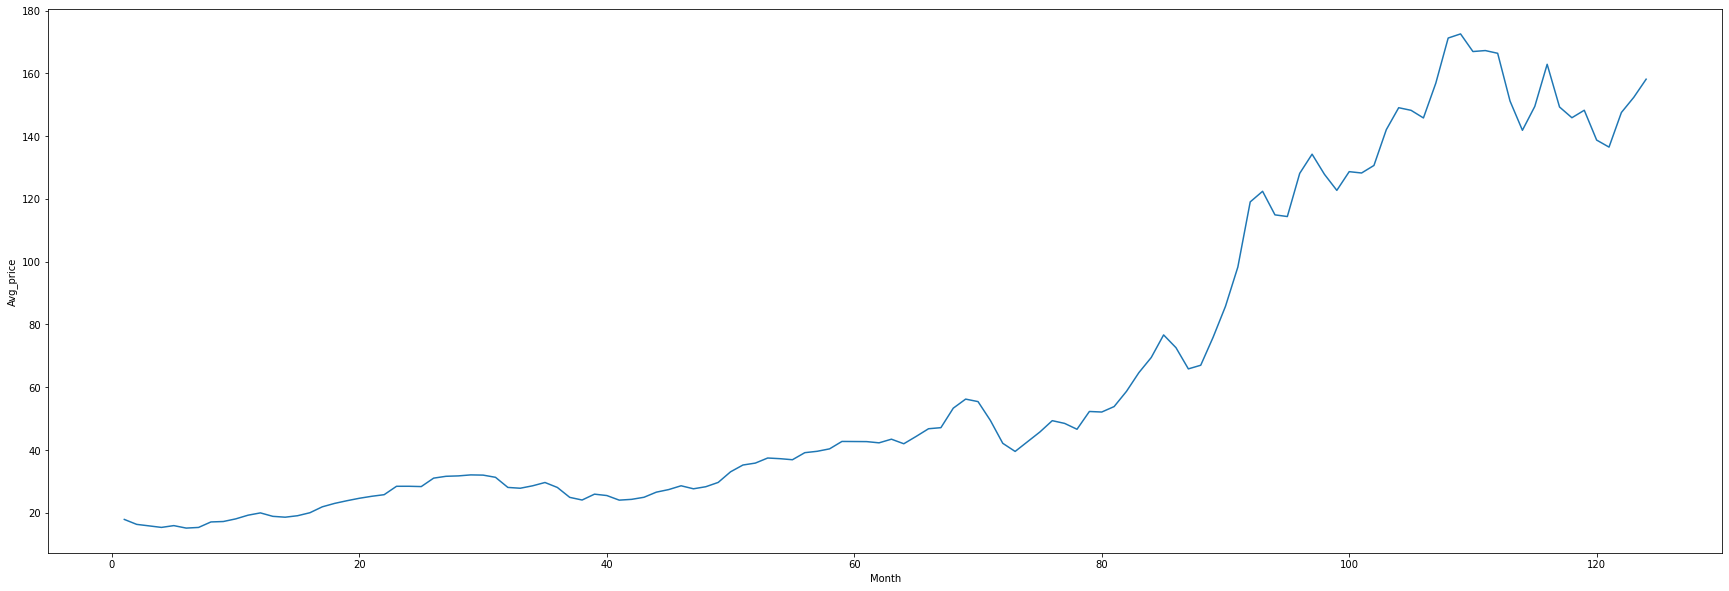

In [4]:
plt.figure(figsize=(30,10))
sns.lineplot(x="Month", y="Avg_price", data=df_monthly)
plt.show()

In [5]:
df_monthly_array=np.asarray(df_monthly)
df_monthly_array

array([[1, '2013-01-01', 19.779285, ..., 13.968525, 13123423600,
        17.85098175],
       [2, '2013-02-01', 16.396786, ..., 13.536427, 9344034000,
        16.277768],
       [3, '2013-03-01', 15.642857, ..., 13.654184, 9176876800,
        15.800089750000001],
       ...,
       [122, '2023-02-01', 143.970001, ..., 147.185272, 1307198900,
        147.52000425],
       [123, '2023-03-01', 146.830002, ..., 159.279999, 1049543200,
        152.35249725],
       [124, '2023-03-21', 157.320007, ..., 159.279999, 73938285,
        158.13499825]], dtype=object)

In [6]:
X_train=df_monthly_array[120:122,0]
X_whole=df_monthly_array[100:124,0]
print(X_train)

[121 122]


In [7]:
Y_train=df_monthly_array[120:122,8]
Y_whole=df_monthly_array[100:124,8]
print(Y_train.shape)

(2,)


In [8]:
'''X_test=np.linspace(122,124,20)
Y_test=df_monthly_array[122:124,8]
print(X_test)
print(Y_test)'''

'X_test=np.linspace(122,124,20)\nY_test=df_monthly_array[122:124,8]\nprint(X_test)\nprint(Y_test)'

In [9]:
'''X_test_modified=[]
for i in X_test:
    X_test_modified.append(round(float(i), 1))
print(X_test_modified)
for i in X_train:
    if i in X_test_modified:
        X_test_modified.remove(i)
X_test_modified=np.array(X_test_modified)
print(X_test_modified.shape)
print(X_test_modified)'''

'X_test_modified=[]\nfor i in X_test:\n    X_test_modified.append(round(float(i), 1))\nprint(X_test_modified)\nfor i in X_train:\n    if i in X_test_modified:\n        X_test_modified.remove(i)\nX_test_modified=np.array(X_test_modified)\nprint(X_test_modified.shape)\nprint(X_test_modified)'

In [10]:
X_test=df_monthly_array[122:124,0]
print(X_test)

[123 124]


# GPR Basic Prototype

In [11]:
def kernel_RBF(length_scale, x_1, x_2):
    return np.exp((x_1-x_2)**2/(-length_scale))
kernel_RBF(4,2,4)

0.36787944117144233

In [12]:
def GPR_fit(X_train):
    Cov_mat=[]
    n=len(X_train)
    for i in range(n):
        temp=[]
        for j in range(n):
            temp.append(kernel_RBF(100,X_train[i],X_train[j]))
        Cov_mat.append(temp)
    return Cov_mat
Cov_mat=GPR_fit(X_train)
print((Cov_mat))

[[1.0, 0.9900498337491681], [0.9900498337491681, 1.0]]


In [15]:
def GPR_predict(Cov_mat, X_train, Y_train, X_test):
    K_1=[]
    for i in range(len(X_test)):
        temp=[]
        for j in range(len(X_train)):
            temp.append(kernel_RBF(100,X_test[i],X_train[j]))
        K_1.append(temp)
    print(K_1)
    INV_Cov_mat=np.linalg.inv(Cov_mat)
    print(INV_Cov_mat)
    K_2=np.dot(np.array(K_1),INV_Cov_mat)
    Y_pred=np.dot(K_2,Y_train)
    K_xx=[]
    sigma=[]
    for i in X_test:
        K_xx.append(kernel_RBF(100,i,i))
    for i in range(len(K_xx)):
        sigma.append(K_xx[i]-np.dot(np.dot(np.array(K_1[i]),INV_Cov_mat),np.array(K_1[i]).T))
    
    return Y_pred,sigma
Y_pred,sigma=GPR_predict(Cov_mat, X_train, Y_train, X_test)
print(Y_pred)
print(sigma)

[[0.9607894391523232, 0.9900498337491681], [0.9139311852712282, 0.9607894391523232]]
[[ 50.50166666 -49.99916668]
 [-49.99916668  50.50166666]]
[155.4225209302309 159.7424583916578]
[0.0007764211251751751, 0.006627823225274998]
